<p style="font-family:Times New Roman, serif; font-size:19px; text-align:justify">
El primer proyecto enfocado a finanzas será el modelo CAPM, en donde obtendré el Beta de un activo y de una cartera, viendo así si el riesgo no sistemático disminuye al invertir en más de una activo. Además veré si el retorno esperado obtenido de confianza. Finalmente calcularé ratios de riesgo y el tracking de error para obtener un mejor conclusión de ambas inversiones. 
</p>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

<p style="font-family:Georgia, serif; font-size:18px; color:dark;">
Modelo CAPM para un activo
</p>

In [2]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [3]:
ticker_activo = 'GOOGL'
ticker_mercado = 'SPY'
start_date = '2020-01-01'
end_date = '2024-12-31'

In [4]:
datos = yf.download([ticker_activo, ticker_mercado], start=start_date, end=end_date)['Close']
retornos_A = np.log(datos / datos.shift(1)).dropna()
retornos_A.columns = ['Activo(Google)', 'Mercado(SPY)']
print("Primeros 5 retornos diarios:")
print(retornos_A.head())

C:\Users\sebax\AppData\Local\Temp\ipykernel_24276\2881999467.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download([ticker_activo, ticker_mercado], start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed

Primeros 5 retornos diarios:
            Activo(Google)  Mercado(SPY)
Date                                    
2020-01-03       -0.005245     -0.007601
2020-01-06        0.026305      0.003808
2020-01-07       -0.001934     -0.002816
2020-01-08        0.007093      0.005316
2020-01-09        0.010443      0.006758


<p style="font-family:Georgia, serif; font-size:18px; color:darkblue;">
Cálculo de Beta.
</p>

<p style="font-family:Georgia, serif; font-size:14px; color:darkblue;">
1) Usando fórmula de Covarianza.
</p>

In [5]:
matriz_covarianza = retornos_A.cov()
cov_activo_mercado = matriz_covarianza.loc['Activo(Google)', 'Mercado(SPY)']
varianza_mercado = retornos_A['Mercado(SPY)'].var()
beta_formula = cov_activo_mercado / varianza_mercado
print(f"Beta calculado con la fórmula: {beta_formula:.4f}")

Beta calculado con la fórmula: 1.1510


<p style="font-family:Georgia, serif; font-size:14px; color:darkblue;">
2) Usando Regresión Lineal.
</p>

In [6]:
# Preparar las variables para la regresión
Y_A = retornos_A['Activo(Google)']
X_A = retornos_A['Mercado(SPY)']
# Añadir una constante (el intercepto) a la variable independiente
X_A = sm.add_constant(X_A)
modelo_activo = sm.OLS(Y_A, X_A).fit()
#resultados = modelo.fit()

In [7]:
# Extraer el coeficiente Beta (la pendiente) y el Alpha (el intercepto)
beta_regresion_A = modelo_activo.params['Mercado(SPY)']
alpha_activo = modelo_activo.params['const']
r_squared_activo = modelo_activo.rsquared
p_value_A = modelo_activo.pvalues['const']
p_value_Beta_A =modelo_activo.pvalues['Mercado(SPY)']

In [8]:
print(f"Beta calculado con regresión OLS: {beta_regresion_A:.4f}")
print(f"r_squared_activo: {r_squared_activo:.6f}")
print(f"alpha_activo: {alpha_activo:.4%}")
print(f"p value constante: {p_value_A:.4f}")
print(f"p value Beta: {p_value_Beta_A:.4f}")


Beta calculado con regresión OLS: 1.1510
r_squared_activo: 0.556778
alpha_activo: 0.0208%
p value constante: 0.5901
p value Beta: 0.0000


In [9]:
print("\n--- Resumen del Modelo de Regresión ---")
print(modelo_activo.summary())


--- Resumen del Modelo de Regresión ---
                            OLS Regression Results                            
Dep. Variable:         Activo(Google)   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     1575.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):          8.15e-224
Time:                        18:15:05   Log-Likelihood:                 3612.2
No. Observations:                1256   AIC:                            -7220.
Df Residuals:                    1254   BIC:                            -7210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const  

In [10]:
risk_free_rate = 0.03
market_return = 0.08
retorno_esperado_capm_activo = risk_free_rate + beta_regresion_A * (market_return - risk_free_rate)

In [11]:
print(f"\n--- Resultado del CAPM ---")
print(f"Tasa Libre de Riesgo (Rf): {risk_free_rate:.2%}")
print(f"Retorno Esperado del Mercado (E(Rm)): {market_return:.2%}")
print(f"Beta del Activo (β): {beta_regresion_A:.4f}")
print(f"Retorno Esperado del Activo (E(Ri)): {retorno_esperado_capm_activo:.2%}")


--- Resultado del CAPM ---
Tasa Libre de Riesgo (Rf): 3.00%
Retorno Esperado del Mercado (E(Rm)): 8.00%
Beta del Activo (β): 1.1510
Retorno Esperado del Activo (E(Ri)): 8.75%


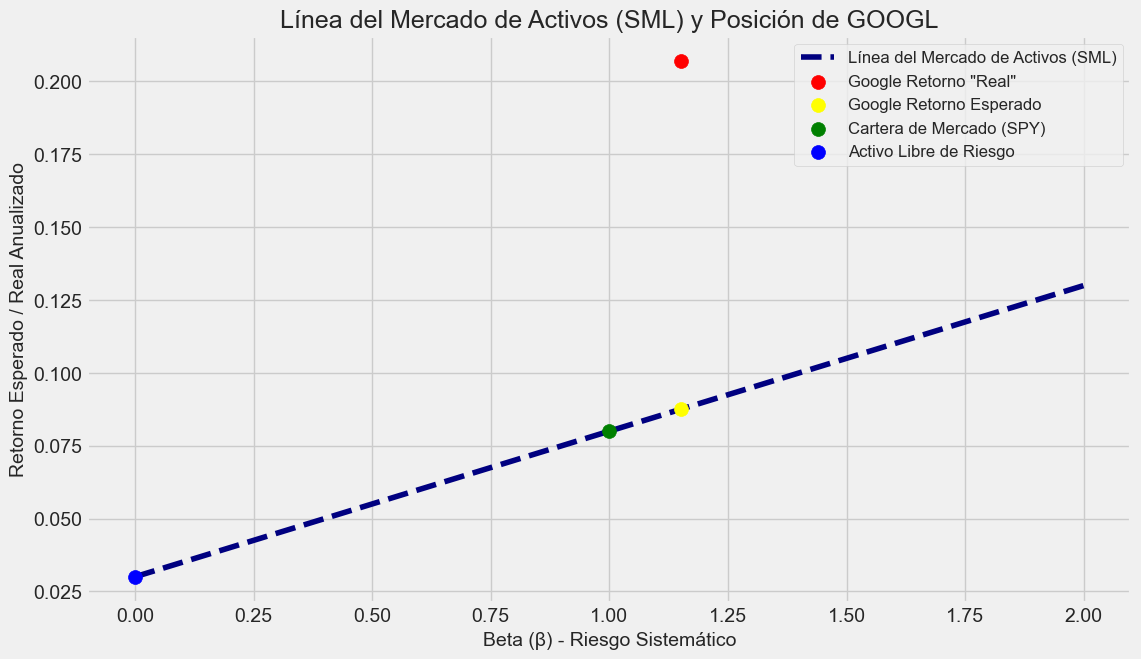

In [12]:
# Para anualizar el retorno logarítmico, simplemente multiplicamos el promedio diario por 252
retorno_anualizado_real_A = retornos_A['Activo(Google)'].mean() * 252

plt.figure(figsize=(12, 7))

# SML
betas_rango_A = np.linspace(0, 2, 100)
sml_A = risk_free_rate + betas_rango_A * (market_return - risk_free_rate)
plt.plot(betas_rango_A, sml_A, color='navy', linestyle='--', label='Línea del Mercado de Activos (SML)')

# Puntos clave
plt.scatter(beta_regresion_A, retorno_anualizado_real_A, color='red', s=100, zorder=5, 
            label=f'Google Retorno "Real"')
plt.scatter(beta_regresion_A, retorno_esperado_capm_activo, color='yellow', s=100, zorder=5, 
            label=f'Google Retorno Esperado')
plt.scatter(1, market_return, color='green', s=100, zorder=5, label='Cartera de Mercado (SPY)')
plt.scatter(0, risk_free_rate, color='blue', s=100, zorder=5, label='Activo Libre de Riesgo')

plt.title('Línea del Mercado de Activos (SML) y Posición de GOOGL', fontsize=18)
plt.xlabel('Beta (β) - Riesgo Sistemático', fontsize=14)
plt.ylabel('Retorno Esperado / Real Anualizado', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

<p style="font-family:Georgia, serif; font-size:18px; color:dark;">
Modelo CAPM para una cartera de inversiones. 
</p>

In [13]:
nuevos_tickers = ['JNJ', 'KO'] # Cartera diversificada
weights = np.array([0.4, 0.3, 0.3])
datos_cartera = yf.download(nuevos_tickers, start=start_date, end=end_date)['Close']
tickers_cartera = nuevos_tickers+[ticker_activo]
datos_cartera['GOOGL']=datos['GOOGL']
datos_cartera['SPY']=datos['SPY']

C:\Users\sebax\AppData\Local\Temp\ipykernel_24276\2591678799.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos_cartera = yf.download(nuevos_tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed


In [14]:
retornos_C = np.log(datos_cartera / datos_cartera.shift(1)).dropna()
retornos_cartera = retornos_C[tickers_cartera]
retornos_C['Cartera']= retornos_cartera.dot(weights)
retornos_C = retornos_C.rename(columns={ticker_mercado: 'Mercado(SPY)'})

In [15]:
# Preparar las variables para la regresión
Y_C = retornos_C['Cartera']
X_C = retornos_C['Mercado(SPY)']
X_C = sm.add_constant(X_C)
modelo_cartera = sm.OLS(Y_C, X_C).fit()

In [16]:
beta_regresion_C = modelo_cartera.params['Mercado(SPY)']
r_squared_cartera = modelo_cartera.rsquared
alpha_cartera = modelo_cartera.params['const']
p_value_const_C = modelo_cartera.pvalues['const']
p_value_Beta_C =modelo_cartera.pvalues['Mercado(SPY)']

In [17]:
print(f"Beta Cartera: {beta_regresion_C:.4f}")
print(f"r_squared_cartera: {r_squared_cartera:.3%}")
print(f"alpha_cartera: {alpha_cartera:.4%}")
print(f"p value constante: {p_value_const_C:.4f}")
print(f"p value Beta: {p_value_Beta_C:.4f}")

Beta Cartera: 0.7276
r_squared_cartera: 68.167%
alpha_cartera: -0.0037%
p value constante: 0.8419
p value Beta: 0.0000


In [18]:
# Imprimir el resumen completo del modelo
print("\n--- Resumen del Modelo de Regresión de la Cartera ---")
print(modelo_cartera.summary())


--- Resumen del Modelo de Regresión de la Cartera ---
                            OLS Regression Results                            
Dep. Variable:                Cartera   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2685.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):          5.46e-314
Time:                        18:15:07   Log-Likelihood:                 4523.1
No. Observations:                1256   AIC:                            -9042.
Df Residuals:                    1254   BIC:                            -9032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [19]:
retorno_esperado_cartera = risk_free_rate + beta_regresion_C * (market_return - risk_free_rate)
print(f"\n--- Resultado del CAPM ---")
print(f"Tasa Libre de Riesgo (Rf): {risk_free_rate:.2%}")
print(f"Retorno Esperado del Mercado (E(Rm)): {market_return:.2%}")
print(f"Beta de la Cartera (β): {beta_regresion_C:.4f}")
print(f"Retorno Esperado de la Cartera(E(Ri)): {retorno_esperado_cartera:.2%}")


--- Resultado del CAPM ---
Tasa Libre de Riesgo (Rf): 3.00%
Retorno Esperado del Mercado (E(Rm)): 8.00%
Beta de la Cartera (β): 0.7276
Retorno Esperado de la Cartera(E(Ri)): 6.64%


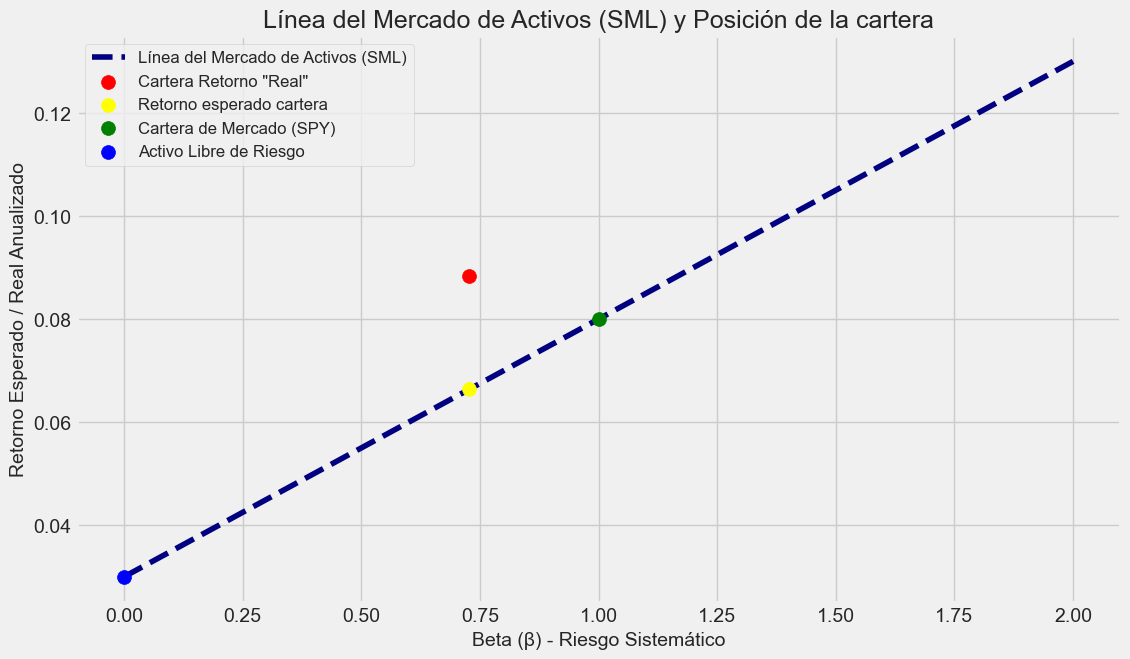

In [20]:
# Para anualizar el retorno logarítmico, simplemente multiplicamos el promedio diario por 252
retorno_anualizado_real_C = retornos_C['Cartera'].mean() * 252

plt.figure(figsize=(12, 7))

# SML
betas_rango_C = np.linspace(0, 2, 100)
sml_C = risk_free_rate + betas_rango_C * (market_return - risk_free_rate)
plt.plot(betas_rango_C, sml_C, color='navy', linestyle='--', label='Línea del Mercado de Activos (SML)')

# Puntos clave
plt.scatter(beta_regresion_C, retorno_anualizado_real_C, color='red', s=100, zorder=5, 
            label='Cartera Retorno "Real"')
plt.scatter(beta_regresion_C, retorno_esperado_cartera, color='yellow', s=100, zorder=5, 
            label='Retorno esperado cartera')
plt.scatter(1, market_return, color='green', s=100, zorder=5, label='Cartera de Mercado (SPY)')
plt.scatter(0, risk_free_rate, color='blue', s=100, zorder=5, label='Activo Libre de Riesgo')

plt.title('Línea del Mercado de Activos (SML) y Posición de la cartera', fontsize=18)
plt.xlabel('Beta (β) - Riesgo Sistemático', fontsize=14)
plt.ylabel('Retorno Esperado / Real Anualizado', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [22]:
print("\n--- Análisis de Regresión y Diversificación ---")
print(f"Resultados para {ticker_activo} (Activo Individual):")
print(f"  Beta (β): {beta_regresion_A:.4f}")
print(f"  R-cuadrado (R²): {r_squared_activo:.4f} ({r_squared_activo:.2%})")

print(f"\nResultados para la Cartera:")
print(f"  Beta (β): {beta_regresion_C:.4f}")
print(f"  R-cuadrado (R²): {r_squared_cartera:.4f} ({r_squared_cartera:.2%})")

print("\n--- Conclusión del Análisis de R² ---")
if r_squared_cartera > r_squared_activo:
    print(f"El R² de la cartera ({r_squared_cartera:.2%}) es MAYOR que el R² del activo individual ({r_squared_activo:.2%}).")
    print("Esto significa que el movimiento del mercado (riesgo sistemático) explica un porcentaje mucho mayor")
    print("del movimiento de nuestra cartera. Se ha 'diversificado' gran parte del riesgo no sistemático.")
else:
    print("El R² de la cartera no fue mayor. Esto sería inusual y podría deberse a una alta correlación entre los activos elegidos.")


--- Análisis de Regresión y Diversificación ---
Resultados para GOOGL (Activo Individual):
  Beta (β): 1.1510
  R-cuadrado (R²): 0.5568 (55.68%)

Resultados para la Cartera:
  Beta (β): 0.7276
  R-cuadrado (R²): 0.6817 (68.17%)

--- Conclusión del Análisis de R² ---
El R² de la cartera (68.17%) es MAYOR que el R² del activo individual (55.68%).
Esto significa que el movimiento del mercado (riesgo sistemático) explica un porcentaje mucho mayor
del movimiento de nuestra cartera. Se ha 'diversificado' gran parte del riesgo no sistemático.


<p style="font-family:Times New Roman, serif; font-size:16px;text-align:justify">
Nuestro análisis del CAPM para el período de 5 años reveló que el activo individual (Google) tiene un Beta de 1.15, y la cartera diversificada tiene un Beta de aproximadamente 0.727, indicando un riesgo sistemático de un 15% superior al del mercado y un 29% inferior respectivamente. El retorno esperado es de 8.75% para Google y de un 6.64% para la cartera, consecuente con la disminución del riesgo debido al éxito en la diversificación, donde además, el R^2 de la cartera (68%) fue superior al del activo (56%), probando que la cartera eliminó exitosamente parte del riesgo no sistemático. El activo obtuvo un retorno "real" alto (aprox 20%) mientras que la cartera tuvo un retorno "real" de aproximadamente 8%. El Alpha es estadísticamente no significativo debido a su p value, por el contrario, podemos concluir que el Beta es fiable debido a su p-value prácticamente de 0.
<p style="font-family:Times New Roman, serif; font-size:16px;">
Para mejorar esto y así obtener una SML más precisa, calcularemos la tasa libre de riesgo y el retorno esperado del mercado de una manera más fiable. Usaremos el índice del rendimiento de las Notas del Tesoro de Estados Unidos a 10 Años para la tasa, y para el retorno realizaremos un promedio del retorno histórico del mercado, por lo cual tendremos un valor de mercado actualizado para la tasa libre de riesgo, mientras que el retorno del mercado, aunque mejorado, sigue siendo una estimación basada en promedios históricos.
</p>

<p style="font-family:Georgia, serif; font-size:18px; color:dark;">
Cálculo de parámetros E(Rm)  y Rf. 
</p>

<p style="font-family:Georgia, serif; font-size:16px; color:darkblue;">
Tasa libre de riesgo
</p>

In [23]:
tnx_data = yf.Ticker('^TNX').history(period='5d')['Close']
current_risk_free_rate = tnx_data.iloc[-1]/100
print(f"Tasa Libre de Riesgo (Rf) (Último ^TNX): {current_risk_free_rate:.4%}")

Tasa Libre de Riesgo (Rf) (Último ^TNX): 4.1200%


<p style="font-family:Georgia, serif; font-size:16px; color:darkblue;">
Retorno esperado del mercado
</p>

In [24]:
spy_hist = yf.download('SPY', start='1993-01-01', end=end_date, progress=False)
spy_log_returns = np.log(spy_hist['Close'] / spy_hist['Close'].shift(1)).dropna()
historical_market_return = spy_log_returns.mean() * 252
historical_market_return=historical_market_return.item()
print(f"Retorno Esperado del Mercado (E(Rm)) (Histórico Anualizado 1993-Hoy): {historical_market_return:.4%}")

C:\Users\sebax\AppData\Local\Temp\ipykernel_24276\753315140.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_hist = yf.download('SPY', start='1993-01-01', end=end_date, progress=False)


Retorno Esperado del Mercado (E(Rm)) (Histórico Anualizado 1993-Hoy): 9.9639%


In [25]:
retorno_esperado_activo_N = current_risk_free_rate + beta_regresion_A * (historical_market_return - current_risk_free_rate)
retorno_esperado_cartera_N = current_risk_free_rate + beta_regresion_C * (historical_market_return - current_risk_free_rate)
print(f"El retorno esperado del activo con calculos más precisos es: {retorno_esperado_activo_N:.4%}")
print(f"El retorno esperado de la cartera con calculos más precisos es:  {retorno_esperado_cartera_N:.4%}")

El retorno esperado del activo con calculos más precisos es: 10.8460%
El retorno esperado de la cartera con calculos más precisos es:  8.3720%


<p style="font-family:Georgia, serif; font-size:18px; color:dark;">
Cálculo de riesgos . 
</p>

<p style="font-family:Times New Roman, serif; font-size:16px;text-align:justify">
Ahora mediremos el riesgo utilizando las métricas VaR, CVaR y MDD. El VaR nos dice que a un cierto porcentaje de confianza (95%) la pérdida promedio no superará X cantidad de dinero, pero no nos dice qué pasa en el porcentaje restante de confianza (5%). Esto último es lo que nos da CVaR. El MDD nos dice, en porcentaje, la mayor caída que tuvo una acción en su historia luego de alcanzar un pico de máximo nivel.
</p>

<p style="font-family:Georgia, serif; font-size:16px; color:darkblue;">
VaR Activo
</p>

In [26]:
confianza = 0.95
var_activo_diario_A = retornos_A['Activo(Google)'].quantile(1 - confianza)
print(f"\n--- Análisis de Riesgo Extremo (VaR y CVaR) ---")
print(f"VaR {confianza:.0%} Diario (Activo): {var_activo_diario_A:.2%}")


--- Análisis de Riesgo Extremo (VaR y CVaR) ---
VaR 95% Diario (Activo): -3.15%


<p style="font-family:Georgia, serif; font-size:16px; color:darkblue;">
CVaR Activo
</p>

In [27]:
cvar_activo_diario_A = retornos_A['Activo(Google)'][retornos_A['Activo(Google)'] <= var_activo_diario_A].mean()
print(f"\nCVaR {confianza:.0%} Diario (Activo): {cvar_activo_diario_A:.2%}")


CVaR 95% Diario (Activo): -4.79%


<p style="font-family:Georgia, serif; font-size:16px; color:darkblue;">
MDD Activo
</p>

In [28]:
retornos_log_acumulados_A = np.exp(retornos_A.cumsum())
pico_acumulado_A = retornos_log_acumulados_A.cummax()
drawdowns_A = (retornos_log_acumulados_A - pico_acumulado_A) / pico_acumulado_A
mdd_activo = drawdowns_A['Activo(Google)'].min()
print(f"\n--- Análisis de Drawdown ---")
print(f"Máximo Drawdown (MDD) del Activo: {mdd_activo:.2%}")


--- Análisis de Drawdown ---
Máximo Drawdown (MDD) del Activo: -44.32%


<p style="font-family:Georgia, serif; font-size:16px; color:darkblue;">
VaR Cartera
</p>

In [29]:
confianza = 0.95
var_activo_diario_C = retornos_C['Cartera'].quantile(1 - confianza)
print(f"\n--- Análisis de Riesgo Extremo (VaR y CVaR) ---")
print(f"VaR {confianza:.0%} Diario (Cartera): {var_activo_diario_C:.2%}")


--- Análisis de Riesgo Extremo (VaR y CVaR) ---
VaR 95% Diario (Cartera): -1.62%


<p style="font-family:Georgia, serif; font-size:16px; color:darkblue;">
CVaR Cartera
</p>

In [30]:
cvar_activo_diario_C = retornos_C['Cartera'][retornos_C['Cartera'] <= var_activo_diario_C].mean()
print(f"\nCVaR {confianza:.0%} Diario (Cartera): {cvar_activo_diario_C:.2%}")


CVaR 95% Diario (Cartera): -2.83%


<p style="font-family:Georgia, serif; font-size:16px; color:darkblue;">
MDD Cartera
</p>

In [31]:
retornos_log_acumulados_C = np.exp(retornos_C.cumsum())
pico_acumulado_C = retornos_log_acumulados_C.cummax()
drawdowns_C = (retornos_log_acumulados_C - pico_acumulado_C) / pico_acumulado_C 
mdd_cartera = drawdowns_C['Cartera'].min()
print(f"\n--- Análisis de Drawdown ---")
print(f"Máximo Drawdown (MDD) de la Cartera: {mdd_cartera:.2%}")


--- Análisis de Drawdown ---
Máximo Drawdown (MDD) de la Cartera: -30.69%


<p style="font-family:Georgia, serif; font-size:18px; color:darkblue;">
Tracking Error
</p>

<p style="font-family:Times New Roman, serif; font-size:16px;text-align:justify">
El tracking de error también es un ratio importante para poder analizar un activo. Mide qué tan de cerca una cartera sigue a su benchmark (índice de referencia). En nuestro caso, el benchmark es el mercado (SPY). Un TE bajo significa que la cartera es muy similar al índice; un TE alto significa que la cartera está tomando apuestas activas, desviándose del índice.
</p>

In [38]:
# El Tracking Error es la desviación estándar de la diferencia de retornos
diferencia_retornos_A = retornos_A['Activo(Google)'] - retornos_A['Mercado(SPY)']
# Calculamos la desviación estándar de esta diferencia y la anualizamos
tracking_error_anualizado_A= diferencia_retornos_A.std() * np.sqrt(252)

print(f"\n--- Análisis del Tracking Error ---")
print(f"Tracking Error Anualizado del Activo vs. SPY: {tracking_error_anualizado_A:.2%}")
print(f"Interpretación: La volatilidad de la diferencia de retornos entre nuestro activo y el mercado "
      f"es del {tracking_error_anualizado_A:.2%}. Un número bajo (< 2%) indicaría una gestión pasiva; "
      f"un número más alto como este indica una gestión activa y concentrada.")


--- Análisis del Tracking Error ---
Tracking Error Anualizado del Activo vs. SPY: 21.89%
Interpretación: La volatilidad de la diferencia de retornos entre nuestro activo y el mercado es del 21.89%. Un número bajo (< 2%) indicaría una gestión pasiva; un número más alto como este indica una gestión activa y concentrada.


In [37]:
# El Tracking Error es la desviación estándar de la diferencia de retornos
diferencia_retornos_C = retornos_C['Cartera'] - retornos_C['Mercado(SPY)']
# Calculamos la desviación estándar de esta diferencia y la anualizamos
tracking_error_anualizado_C= diferencia_retornos_C.std() * np.sqrt(252)

print(f"\n--- Análisis del Tracking Error ---")
print(f"Tracking Error Anualizado de la Cartera vs. SPY: {tracking_error_anualizado_C:.2%}")
print(f"Interpretación: La volatilidad de la diferencia de retornos entre nuestra cartera y el mercado "
      f"es del {tracking_error_anualizado_C:.2%}. Un número bajo (< 2%) indicaría una gestión pasiva; "
      f"un número más alto como este indica una gestión activa, aunque significativamente menos que Google.")


--- Análisis del Tracking Error ---
Tracking Error Anualizado de la Cartera vs. SPY: 11.96%
Interpretación: La volatilidad de la diferencia de retornos entre nuestra cartera y el mercado es del 11.96%. Un número bajo (< 2%) indicaría una gestión pasiva; un número más alto como este indica una gestión activa, aunque significativamente menos que Google.


<p style="font-family:Times New Roman, serif; font-size:16px;text-align:justify">
Tras esto podemos ver que la cartera tiene menos riesgo debido a la diversificación, a pesar de que esta no fue optimizada como lo haré en el proyecto final. Por el tracking de error, vemos que tanto la cartera como la acción Google tienen una gestión activa, aunque significativamente más por Google de forma individual. Ahora debido al gran MDD de Google, y a su gran promedio de retorno anualizados, veré si se puede encontrar alguna explicación numérica a través de posibles condiciones causantes de esto.
</p>